In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from __future__ import division 

In [3]:
data =np.loadtxt('C:/Users/Santhosh/Documents/Andrew NG Machine Learning/Week 2/ex2data1.txt',delimiter=',')

In [4]:
data[1:6,]

array([[ 30.28671077,  43.89499752,   0.        ],
       [ 35.84740877,  72.90219803,   0.        ],
       [ 60.18259939,  86.3085521 ,   1.        ],
       [ 79.03273605,  75.34437644,   1.        ],
       [ 45.08327748,  56.31637178,   0.        ]])

In [5]:
x =np.c_[np.ones(data.shape[0]),data[:,0:2]]

In [6]:
y=np.c_[data[:,2]]

In [7]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

In [8]:
def costfunction(theta,x,y):
    m=y.size
    h=sigmoid(x.dot(theta))
    i = (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y)) 
    J = i * (-1/m) 
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [9]:
def gradient(theta,x,y):
    m=y.size
    h=sigmoid(x.dot(theta.reshape(-1,1)))
    grad = (x.T.dot(h-y)) * 1/m
    return(grad.flatten())

In [10]:
initial_theta = np.zeros(x.shape[1])
initial_theta.shape

(3L,)

In [11]:
res = minimize(costfunction,initial_theta,args=(x,y),method=None,jac=gradient,options ={'maxiter':300})
res.x

C:\Users\Santhosh\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in log


array([-25.16133401,   0.20623172,   0.2014716 ])

In [12]:
print(res.x)
print(res.x.shape)
print(res.x.T)
print(res.x.T.shape)

[-25.16133401   0.20623172   0.2014716 ]
(3L,)
[-25.16133401   0.20623172   0.2014716 ]
(3L,)


In [13]:
def predict(theta,x,threshold = 0.5):
    pred = sigmoid(x.dot(theta.T)) >= threshold
    return(pred.astype('int'))
 

In [14]:
prob = predict(res.x,x)
print('Accuracy:{}%'.format(np.mean(prob ==y.ravel())*100))

Accuracy:89.0%


In [15]:
def regcostfunction(theta,reg,x,y):
    m=y.size
    h=sigmoid(x.dot(theta))
    J = -1 * 1/m * (np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg *1/(2*m) * np.sum( np.square(theta[1:]) ))
    #if np.isnan(J[0]):
        #return(np.inf)
    return(J)

In [16]:
def reggradient(theta,reg,x,y):
    m=y.size
    h=sigmoid(x.dot(theta.reshape(-1,1)))
    grad = ( x.T.dot(h-y)*(1/m) ) + ( np.r_[[[0]],theta[1:].reshape(-1,1)] * (reg/m) )
    return(grad.flatten())

In [17]:
data2 =np.loadtxt('C:/Users/Santhosh/Documents/Andrew NG Machine Learning/Week 2/ex2data2.txt',delimiter=',')

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
#x1 = np.c_[np.ones(data1.shape[0]),data1[:,0:2]]
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
y = np.c_[data2[:,2]]
X = data2[:,0:2]

In [20]:
initial_theta = np.zeros(XX.shape[1])
#p=np.zeros((x1.shape[0],3))

In [21]:
neg=data2[:,2]==0
pos=data2[:,2]==1

In [22]:
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [23]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

C:\Users\Santhosh\Anaconda2\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Users\Santhosh\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


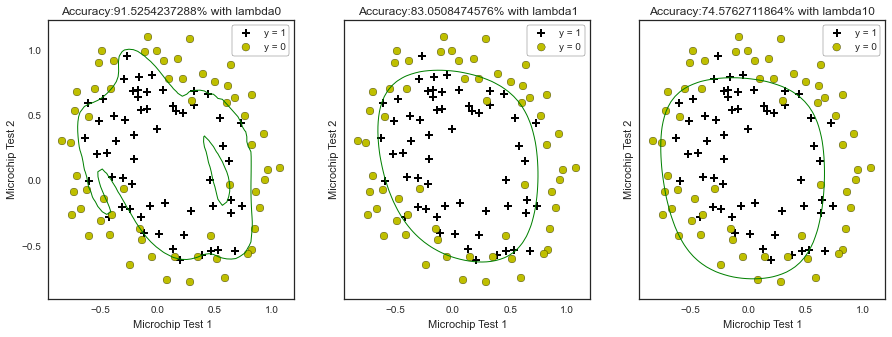

In [24]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(15,5))
for i, c in enumerate([0,1,10]):
    res1= minimize(regcostfunction,initial_theta,args=(c,XX,y),method=None,jac=reggradient,options={'maxiter':3000})
    prob = predict(res1.x,XX)
    accuracy = np.mean(prob ==y.ravel())*100
    #print('Accuracy:{}% with lambda{}'.format(accuracy,c))
    #plt.scatter(data2[neg][:,0], data2[neg][:,1],s=60,c='r',marker='x',linewidths=1)
    #plt.scatter(data2[pos][:,0], data2[pos][:,1],s=60,c='b',marker='+',linewidths=1)
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    x1_min,x1_max = X[:,0].min(),X[:,0].max()
    x2_min,x2_max = X[:,1].min(),X[:,1].max()
    xx1,xx2 = np.meshgrid(np.linspace(x1_min,x1_max),np.linspace(x2_min,x2_max))
    h=sigmoid(poly.fit_transform(np.c_[xx1.ravel(),xx2.ravel()]).dot(res1.x))
    h= h.reshape(xx1.shape)

    #plt.xlabel('Microship Test1')
    #plt.xlabel('Microship Test2')
    axes.flatten()[i].contour(xx1,xx2,h,[0.5],linewidths=1,colors='g')
    axes.flatten()[i].set_title('Accuracy:{}% with lambda{}'.format(accuracy,c))
    


In [25]:
prob = predict(res1.x,XX)
print('Accuracy:{}%'.format(np.mean(prob ==y.ravel())*100))

Accuracy:74.5762711864%
